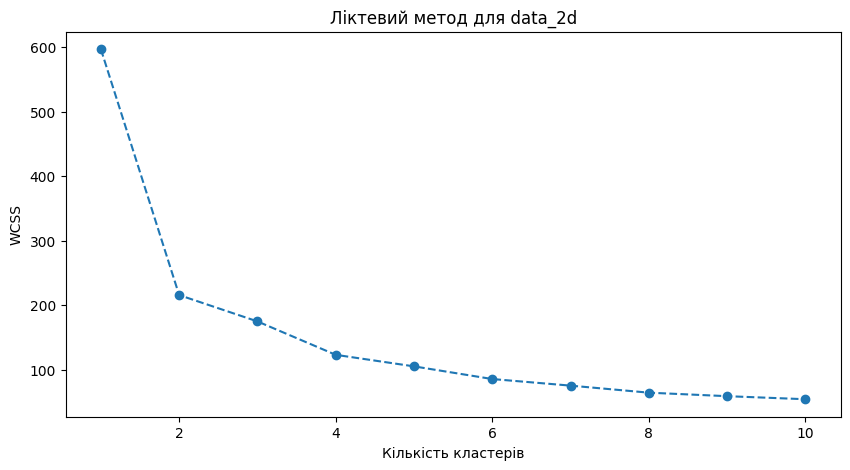

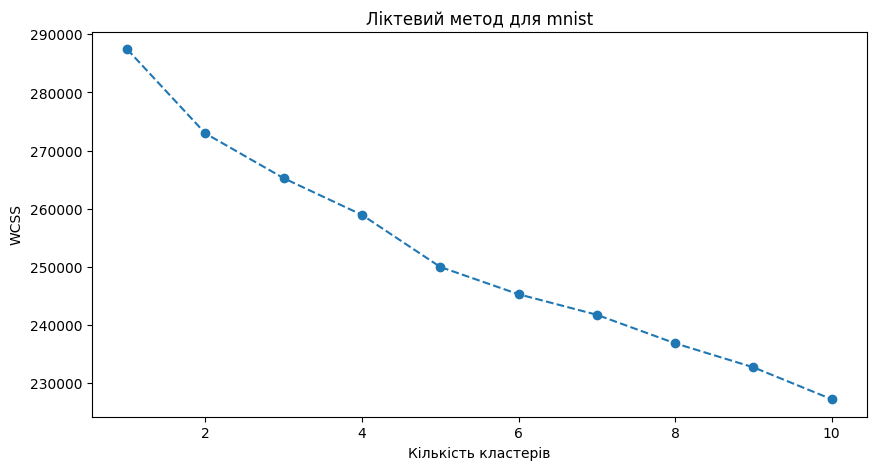

In [2]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from sklearn.cluster import KMeans # type: ignore
from sklearn.preprocessing import StandardScaler # type: ignore

# Завантаження даних
data_2d = pd.read_csv('data_2d.csv')
mnist = pd.read_csv('mnist.csv')

# Функція для застосування K-means та ліктевого методу
def kmeans_elbow(data, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Обробка даних для data_2d
scaler_2d = StandardScaler()
data_2d_scaled = scaler_2d.fit_transform(data_2d)

# Застосування K-means та ліктевого методу для data_2d
wcss_2d = kmeans_elbow(data_2d_scaled)

# Візуалізація ліктевого методу для data_2d
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_2d, marker='o', linestyle='--')
plt.title('Ліктевий метод для data_2d')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

# Обробка даних для mnist
scaler_mnist = StandardScaler()
mnist_scaled = scaler_mnist.fit_transform(mnist)

# Застосування K-means та ліктевого методу для mnist
wcss_mnist = kmeans_elbow(mnist_scaled)

# Візуалізація ліктевого методу для mnist
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss_mnist, marker='o', linestyle='--')
plt.title('Ліктевий метод для mnist')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.show()

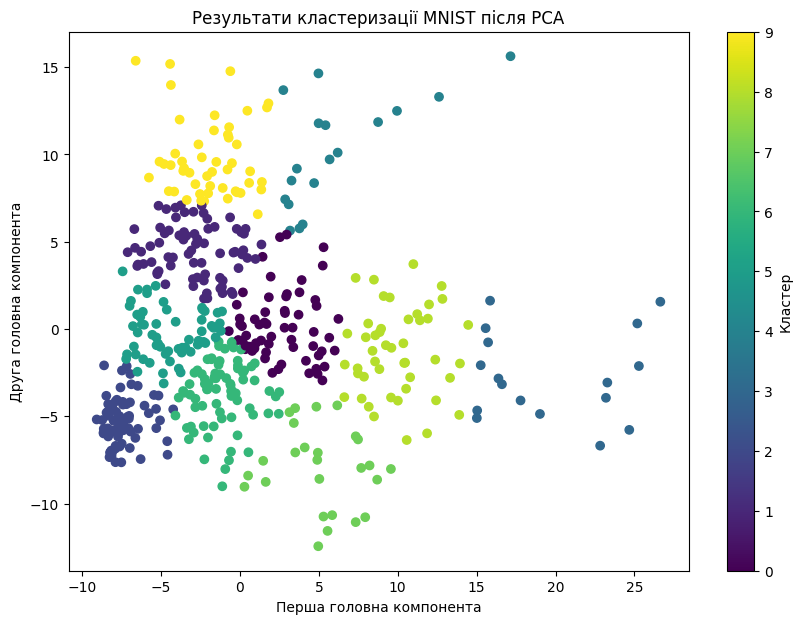

In [3]:

from sklearn.decomposition import PCA

# Завантаження даних
mnist = pd.read_csv('mnist.csv')

# Обробка даних
scaler_mnist = StandardScaler()
mnist_scaled = scaler_mnist.fit_transform(mnist)

# Зменшення розмірності за допомогою PCA
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_scaled)

# Застосування K-means кластеризації
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
mnist_labels = kmeans.fit_predict(mnist_pca)

# Візуалізація результатів
plt.figure(figsize=(10, 7))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=mnist_labels, cmap='viridis')
plt.title('Результати кластеризації MNIST після PCA')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.colorbar(label='Кластер')
plt.show()